# Check whether this thing is working

In [1]:
"Hello World"

'Hello World'

# DNA Framework

![](img/1.jpg)

![](img/2.jpg)

# Import libraries

In [2]:
import seaborn as sns
import matplotlib as plt
import re
import pandas as pd

# Import Dataset



In [3]:
movies = pd.read_csv('movies_metadata.csv')

C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data pre-processing
    - Clear null rows
    - Clean columns
    - Clear dropulicated rows
    - Binning data
    - Preparing data for modeling

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
movies.shape

(45466, 24)

## To see that how much are the NA columns

In [8]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
# we have to copy the dataset into another pandas dataframe so we can be able to manage it with high risk.
df = movies.copy()

In [10]:
# checking information of each column, so we can decide what columns to be kept or dropped
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
# #dropping unused columns
# it doesn't seem to be close to the reason to choose those columns because it's not even related 
# to our business objective and some of those are similar to columns
df.drop(columns=['belongs_to_collection', 'budget', 'id', 'imdb_id', 'poster_path', 'production_countries','release_date', 'revenue', 'status','tagline', 'title', 'video', 'homepage', 'spoken_languages'], axis='columns', inplace=True)

In [12]:
#check if it's dropped
df.columns

Index(['adult', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

In [13]:
# check whether there's null columns in each row or not
df.isna().sum()

adult                     0
genres                    0
original_language        11
original_title            0
overview                954
popularity                5
production_companies      3
runtime                 263
vote_average              6
vote_count                6
dtype: int64

In [14]:
#it's almost 100% holy s***
#so I wonder how about another null columns?
(df.isna().sum() * 100 / df.shape[0]).round(2)

adult                   0.00
genres                  0.00
original_language       0.02
original_title          0.00
overview                2.10
popularity              0.01
production_companies    0.01
runtime                 0.58
vote_average            0.01
vote_count              0.01
dtype: float64

In [15]:
#check
df.columns

Index(['adult', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

In [16]:
#let's move to the next one
#overview
df.loc[df['overview'].isnull()]

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
32,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",fr,"Guillaumet, les ailes du courage",NaN,0.745542,"[{'name': 'Iwerks Entertainment', 'id': 70801}]",50.0,6.8,4.0
300,False,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",sv,Roommates,NaN,3.39587,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",108.0,6.4,7.0
634,False,"[{'id': 35, 'name': 'Comedy'}]",de,Peanuts – Die Bank zahlt alles,NaN,0.066123,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",NaN,4.0,1.0
635,False,"[{'id': 35, 'name': 'Comedy'}]",de,Happy Weekend,NaN,0.002229,"[{'name': 'Senator Film Produktion', 'id': 191}]",NaN,0.0,0.0
641,False,"[{'id': 35, 'name': 'Comedy'}]",de,Das Superweib,NaN,0.821299,"[{'name': 'Constantin Film', 'id': 47}]",86.0,5.3,7.0
...,...,...,...,...,...,...,...,...,...,...
45342,False,"[{'id': 18, 'name': 'Drama'}]",en,Over/Under,NaN,0.704642,"[{'name': 'Fox Television Studios', 'id': 6529...",87.0,4.0,2.0
45377,False,"[{'id': 12, 'name': 'Adventure'}]",es,Simbad e il califfo di Bagdad,NaN,0.006352,"[{'name': 'Roas Produzioni', 'id': 21137}, {'n...",NaN,0.0,0.0
45398,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",fi,Lauri Mäntyvaaran tuuheet ripset,NaN,0.347806,"[{'name': 'Elokuvayhtiö Oy Aamu', 'id': 84883}]",90.0,8.0,1.0
45399,False,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",ru,Все и сразу,NaN,0.201582,"[{'name': 'Кинокомпания «Lunapark»', 'id': 420...",0.0,6.0,4.0


In [17]:
#it's neccesary to have overview, it represents as a short version of the movie
#so I decided to drop the NaN rows
df.dropna(axis='rows', inplace=True)

In [18]:
df.shape[0]

44496

In [19]:
df.isna().sum()

adult                   0
genres                  0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
runtime                 0
vote_average            0
vote_count              0
dtype: int64

In [20]:
df.head()

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",81.0,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",104.0,6.9,2413.0
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",101.0,6.5,92.0
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,127.0,6.1,34.0
4,False,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",106.0,5.7,173.0


In [21]:
#rename genres of each movies
regex = re.compile(r": '(.*?)'")
df['genres'] = df['genres'].apply(lambda x: ", ".join(regex.findall(x)))
df

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
0,False,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",81.0,7.7,5415.0
1,False,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",104.0,6.9,2413.0
2,False,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",101.0,6.5,92.0
3,False,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,127.0,6.1,34.0
4,False,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,False,"Drama, Family",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],90.0,4.0,1.0
45462,False,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",360.0,9.0,3.0
45463,False,"Action, Drama, Thriller",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",90.0,3.8,6.0
45464,False,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",87.0,0.0,0.0


In [22]:
#reset index
df.reset_index(drop=True)

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
0,False,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",81.0,7.7,5415.0
1,False,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",104.0,6.9,2413.0
2,False,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",101.0,6.5,92.0
3,False,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,127.0,6.1,34.0
4,False,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
44491,False,"Drama, Family",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],90.0,4.0,1.0
44492,False,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",360.0,9.0,3.0
44493,False,"Action, Drama, Thriller",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",90.0,3.8,6.0
44494,False,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",87.0,0.0,0.0


In [23]:
#rename production names and production countries
df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))

In [24]:
#check
df

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
0,False,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,Pixar Animation Studios,81.0,7.7,5415.0
1,False,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"TriStar Pictures, Teitler Film, Interscope Com...",104.0,6.9,2413.0
2,False,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",101.0,6.5,92.0
3,False,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,Twentieth Century Fox Film Corporation,127.0,6.1,34.0
4,False,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"Sandollar Productions, Touchstone Pictures",106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,False,"Drama, Family",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,,90.0,4.0,1.0
45462,False,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,Sine Olivia,360.0,9.0,3.0
45463,False,"Action, Drama, Thriller",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,90.0,3.8,6.0
45464,False,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,87.0,0.0,0.0


In [25]:
#check whether renamed columns are null or not
df.isna().sum()

adult                   0
genres                  0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
runtime                 0
vote_average            0
vote_count              0
dtype: int64

In [26]:
#check whether there's really NO null in genres column
df.loc[df['genres'] == '']

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
55,False,,en,Kids of the Round Table,"Set in modern times, Alex finds King Arthur's ...",0.307075,"Telefilm Canada, Melenny Productions",89.0,3.0,1.0
83,False,,en,Last Summer in the Hamptons,"Filmed entirely on location in East Hampton, L...",0.531159,,108.0,0.0,0.0
126,False,,en,Jupiter's Wife,"Michel Negroponte, a documentary filmmaker, me...",0.001178,,87.0,0.0,0.0
137,False,,en,Target,A subtle yet violent commentary on feudal lords.,0.001205,,122.0,0.0,0.0
390,False,,en,Desert Winds,Jackie and Eugene are joined by a mystical win...,0.251223,,97.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45447,False,,fr,Le Roi du maquillage,The background of this picture represents a sc...,0.213973,Star Film Company,3.0,6.0,6.0
45448,False,,fr,Les Transmutations imperceptibles,This shows a prince entering upon the stage of...,0.071782,Star Film Company,2.0,5.0,2.0
45455,False,,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,0.225051,,90.0,6.0,3.0
45464,False,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,87.0,0.0,0.0


In [27]:
#Dropping rows that don't contain type
df.drop(df.loc[df['genres'] == ""].index, inplace=True)

In [28]:
#check how is non-en movies like
df.loc[df['original_language'] != 'en']

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
28,False,"Fantasy, Science Fiction, Adventure",fr,La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,9.82242,"Procirep, Constellation Productions, France 3 ...",108.0,7.6,308.0
29,False,"Drama, Crime",zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,1.10091,"Ministère des Affaires Étrangères, Alpha Films...",108.0,6.5,17.0
52,False,"Drama, Foreign",it,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",1.36129,,116.0,7.7,11.0
57,False,"Comedy, Drama, Romance",it,Il postino,Simple Italian postman learns to love poetry w...,10.1684,,108.0,7.6,181.0
58,False,"Thriller, Drama, Mystery",fr,Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",0.120789,,100.0,6.5,2.0
...,...,...,...,...,...,...,...,...,...,...
45450,False,"Fantasy, Action, Thriller",fr,L'Homme orchestre,A band-leader has arranged seven chairs for th...,1.109068,Star Film Company,1.0,6.5,22.0
45451,False,"Comedy, Fantasy",fr,Nouvelles luttes extravagantes,A series of fantastical wrestling matches.,0.225432,Star-Film,2.0,6.5,6.0
45453,False,"Crime, Drama, Thriller",hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,"Mad Films, Third Eye Pictures",146.0,6.6,14.0
45461,False,"Drama, Family",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,,90.0,4.0,1.0


In [29]:
# we only be able to use EN language so, we decided to drop out the movies those are not en in original language column
df.drop(df.loc[df['original_language'] != 'en'].index, inplace=True)

In [30]:
df

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
0,False,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,Pixar Animation Studios,81.0,7.7,5415.0
1,False,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"TriStar Pictures, Teitler Film, Interscope Com...",104.0,6.9,2413.0
2,False,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",101.0,6.5,92.0
3,False,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,Twentieth Century Fox Film Corporation,127.0,6.1,34.0
4,False,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"Sandollar Productions, Touchstone Pictures",106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45457,False,"Mystery, Horror",en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,,45.0,7.0,2.0
45458,False,Horror,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.38645,"Neptune Salad Entertainment, Pirie Productions",30.0,7.0,1.0
45459,False,Science Fiction,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,Concorde-New Horizons,85.0,3.5,1.0
45460,False,"Drama, Action, Romance",en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"Westdeutscher Rundfunk (WDR), Working Title Fi...",104.0,5.7,26.0


In [31]:
#check if there's NO more null in production_companies column
df['production_companies'] = df['production_companies'].astype('string')

In [32]:
df.loc[df['production_companies'] == '']

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
50,False,"Action, Thriller, Drama",en,Guardian Angel,Detective - turned - bodyguard Cynthia McKay (...,0.595949,,93.0,6.3,3.0
106,False,Documentary,en,Catwalk,A documentary following Christy Turlington and...,0.976707,,95.0,7.0,2.0
107,False,Crime,en,Headless Body in Topless Bar,An ex-con holds a group of people hostage in a...,0.001346,,110.0,0.0,0.0
114,False,"Documentary, Drama, Foreign",en,Anne Frank Remembered,Using previously unreleased archival material ...,0.243986,,117.0,7.3,4.0
119,False,Drama,en,The Boys of St. Vincent,The true story of boys being sexually abused a...,0.86539,,90.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...
45431,False,Documentary,en,Rivers of Sand,The people portrayed in this film are called H...,0.0375,,83.0,0.0,0.0
45432,False,Documentary,en,Altar of Fire,This film records a 12 day ritual performed by...,0.0,,45.0,0.0,0.0
45440,False,"Drama, Family, TV Movie",en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,,89.0,5.0,12.0
45452,False,Documentary,en,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",0.011025,,58.0,0.0,0.0


In [33]:
df.drop(df.loc[df['production_companies'] == ''].index, inplace=True)

In [34]:
df.loc[df['production_companies'] == '']

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count


In [35]:
df.shape

(23416, 10)

In [36]:
#check whether there's duplicated data in a form of original_title or not
df['original_title'] = df['original_title'].astype('string')
df.loc[df['original_title'].duplicated()]

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
888,False,"Comedy, Drama, Romance",en,Sabrina,Linus and David Larrabee are the two sons of a...,7.35974,Paramount Pictures,113.0,7.4,284.0
930,False,Drama,en,The Scarlet Letter,"In Puritan Boston, seamstress Hester Prynne is...",0.284522,Metro-Goldwyn-Mayer (MGM),115.0,8.3,4.0
1296,False,"Drama, Thriller",en,Cape Fear,Sam Bowden witnesses a rape committed by Max C...,7.58319,Melville-Talbot Productions,105.0,7.2,125.0
1832,False,Drama,en,Hamlet,"Winner of four Academy Awards, including Best ...",3.18807,Two Cities Films,155.0,7.1,48.0
1950,False,"Comedy, Drama, Family",en,The Parent Trap,Hallie Parker and Annie James are identical tw...,7.76883,Walt Disney Pictures,127.0,6.8,768.0
...,...,...,...,...,...,...,...,...,...,...
45415,False,Documentary,en,The Hunters,An ethnographic film that documents the effort...,0.141547,"Harvard University, Peabody Museum, Film Study...",72.0,5.0,1.0
45420,False,"Drama, Family, Fantasy",en,Arabian Nights,Scheherezade puts herself in danger to save Su...,2.266456,"Studio Babelsberg, International Traders, Hall...",175.0,6.9,21.0
45454,False,"Comedy, Drama",en,The Morning After,The Morning After is a feature film that consi...,0.139936,"Oops Doughnuts Productions, He and She Films",79.0,4.0,2.0
45460,False,"Drama, Action, Romance",en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"Westdeutscher Rundfunk (WDR), Working Title Fi...",104.0,5.7,26.0


In [37]:
#dropping
df.drop(df.loc[df['original_title'].duplicated()].index, inplace=True)

In [38]:
df

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
0,False,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,Pixar Animation Studios,81.0,7.7,5415.0
1,False,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"TriStar Pictures, Teitler Film, Interscope Com...",104.0,6.9,2413.0
2,False,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",101.0,6.5,92.0
3,False,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,Twentieth Century Fox Film Corporation,127.0,6.1,34.0
4,False,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"Sandollar Productions, Touchstone Pictures",106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45446,False,"Fantasy, Comedy",en,Le locataire diabolique,A man rents an apartment and furnishes it in r...,0.725084,Star Film Company,6.0,6.7,12.0
45449,False,"Animation, Family",en,Pooh's Heffalump Halloween Movie,"It's Halloween in the 100 Acre Wood, and Roo's...",2.568495,Walt Disney Pictures,67.0,5.4,7.0
45456,False,"Horror, Mystery, Thriller",en,House of Horrors,An unsuccessful sculptor saves a madman named ...,0.222814,Universal Pictures,65.0,6.3,8.0
45458,False,Horror,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.38645,"Neptune Salad Entertainment, Pirie Productions",30.0,7.0,1.0


In [39]:
df.shape

(22221, 10)

In [40]:
df.loc[df['runtime'] ==  0.000000]

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
222,False,Thriller,en,Dream Man,Kris is a homicide cop with psychic abilities....,0.155859,"Keystone Pictures, Dream Man Productions Inc",0.0,2.5,1.0
667,False,"Drama, Romance",en,The Run of the Country,An Irish lad (Matt Keeslar) who fled from his ...,0.117662,"Castle Rock Entertainment, Columbia Pictures C...",0.0,8.0,2.0
5188,False,Drama,en,World Traveler,After hitting the road a man encounters charac...,1.25122,"Eureka Pictures, IFC Productions",0.0,5.0,3.0
5399,False,"Comedy, Family, Romance",en,Children on Their Birthdays,Havoc is created in a small Southern community...,0.885044,Crusader Entertainment,0.0,7.0,1.0
5652,False,"Drama, Romance, Foreign",en,Manjar de amor,Young aspiring pianist attracts attention of f...,0.508711,TLA Releasing,0.0,3.6,4.0
...,...,...,...,...,...,...,...,...,...,...
45191,False,"Action, Science Fiction, Thriller",en,Drone Wars,"When drones arrive in a flash, slaughtering hu...",1.451207,Cinetel Films,0.0,3.0,7.0
45328,False,Drama,en,Purgatory House,An inside glimpse of how it feels to be a teen...,0.056262,Free Dream Pictures,0.0,6.0,1.0
45371,False,Animation,en,LEGO DC Super Hero Girls: Brain Drain,"When Supergirl, Wonder Woman, Batgirl, Bumbleb...",8.413734,Warner Bros. Animation,0.0,10.0,2.0
45416,False,Comedy,en,Rigadin peintre cubiste,After visiting the first Cubist exposition in ...,0.003732,Pathé Frères,0.0,0.0,0.0


In [41]:
df.drop(df.loc[df['runtime'] == 0.00].index, inplace=True)

In [42]:
df.loc[df['vote_average'] == 0]

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count
164,False,"Drama, Crime",en,Feast of July,After an abandoned young woman in late 19th Ce...,0.523575,"Touchstone Pictures, Merchant Ivory Productions",116.0,0.0,0.0
280,False,"Action, Thriller, Crime, Drama",en,New York Cop,"Allegedly based on a true story, this film fol...",0.004537,"TOEI, Distant Justice Joint Venture",93.0,0.0,0.0
395,False,"Thriller, Drama",en,Homage,The young caretaker at the estate of a reclusi...,0.014925,"Skyline Entertainment Partners, Arrow",97.0,0.0,0.0
397,False,Comedy,en,Open Season,When the television ratings machines suddenly ...,0.012456,"Home Box Office (HBO), Frozen Rope Productions...",97.0,0.0,0.0
726,False,"Comedy, Drama",en,Brothers in Trouble,Amir is an illegal Pakistani immigrant smuggle...,0.594716,Renegade Films,102.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
44998,False,Drama,en,Losing It,Comedy-drama about an advertising executive wh...,0.039211,Clerkenwell Films,90.0,0.0,0.0
45006,False,Documentary,en,78/52,78 shots. 52 cuts. The shower scene from PSYCHO.,2.488539,Exhibit A Pictures,91.0,0.0,4.0
45013,False,Drama,en,Do You Take This Man,When a gay couple's impending wedding hits a s...,0.814903,Modern Love,92.0,0.0,0.0
45367,False,Science Fiction,en,The Stranger: Summoned by Shadows,Wearied by his travels through time and space ...,3.5e-05,BBV Productions,34.0,0.0,0.0


In [43]:
df.drop(df.loc[df['vote_average'] == 0.00].index, inplace=True)

In [44]:
df_eda = df.copy()

In [45]:
def runtime_bin(x):
    if x['runtime'] < 120:
        if x['runtime'] <= 30:
            return 'Short'
        else :
            return 'Medium'
    else :
        return 'Long'

In [46]:
df['runtime'] = df.apply(lambda x: runtime_bin(x), axis=1)

In [47]:
df['popularity'] = df['popularity'].astype('float64')

In [48]:
df['popularity'] = pd.cut(df['popularity'], bins=3, labels=['Low', 'Medium', 'High'])

In [49]:
df['vote_average'] = pd.cut(df['vote_average'], bins=3, labels=['Low', 'Medium', 'High'])
df['vote_count'] = pd.cut(df['vote_count'], bins=3, labels=['Low', "Medium", 'High'])

In [50]:
# mapping adult movies
df['adult'] = df['adult'].astype('string')
df['adult'] = df['adult'].map({"True" : "Adult", "False":"Non-Adult"})

In [51]:
df.reset_index(inplace=True)

# EDA

In [52]:
###Visualization
import matplotlib.pyplot as plt

#selecting jumanji movie to compare which movies are similar?
# similar_jumanji = df_eda.loc[df_eda['original_title'] == 'Jumanji']
# s = similar_jumanji['genres'][0].split(', ')
# print(s)


In [53]:
#count amount of total genres
def countgenre(data):
  dicts = {}
  # runtimeDict = {}
  i = 0
  for x in data:
    for y in x:
      if y not in dicts.keys():
        dicts[y] = 0
        # runtimeDict[y] = 0
      dicts[y] = int(dicts[y])+1
      # runtimeDict[y] = int(runtimeDict[y])+runtime[i]
    # i += 1
  return dicts

In [54]:
GENRE = df_eda['genres'].str.split(", ")
# RUNTIME = df_eda['runtime'].values
GENRES = countgenre(GENRE)
GENRES


{'Animation': 977,
 'Comedy': 6825,
 'Family': 1713,
 'Adventure': 2167,
 'Fantasy': 1273,
 'Romance': 3612,
 'Drama': 9636,
 'Action': 3718,
 'Crime': 2553,
 'Thriller': 4612,
 'Horror': 2862,
 'History': 660,
 'Science Fiction': 1930,
 'Mystery': 1540,
 'War': 725,
 'Music': 933,
 'Documentary': 1244,
 'Foreign': 261,
 'Western': 670,
 'TV Movie': 429}

In [55]:
colGenre = pd.DataFrame(data=GENRES.keys(),columns=['genres'])
rowGenre = pd.DataFrame(data=GENRES.values(),columns=['count_genre'])
colGenre.reset_index(inplace=True)
rowGenre.reset_index(inplace=True)
Genre = pd.merge(colGenre,rowGenre,on=['index','index'])
Genre
# create count genres dataframe for checking value count each genres

,index,genres,count_genre
0,0,Animation,977
1,1,Comedy,6825
2,2,Family,1713
3,3,Adventure,2167
4,4,Fantasy,1273
5,5,Romance,3612
6,6,Drama,9636
7,7,Action,3718
8,8,Crime,2553
9,9,Thriller,4612


Text(0, 0.5, 'Count Genres')

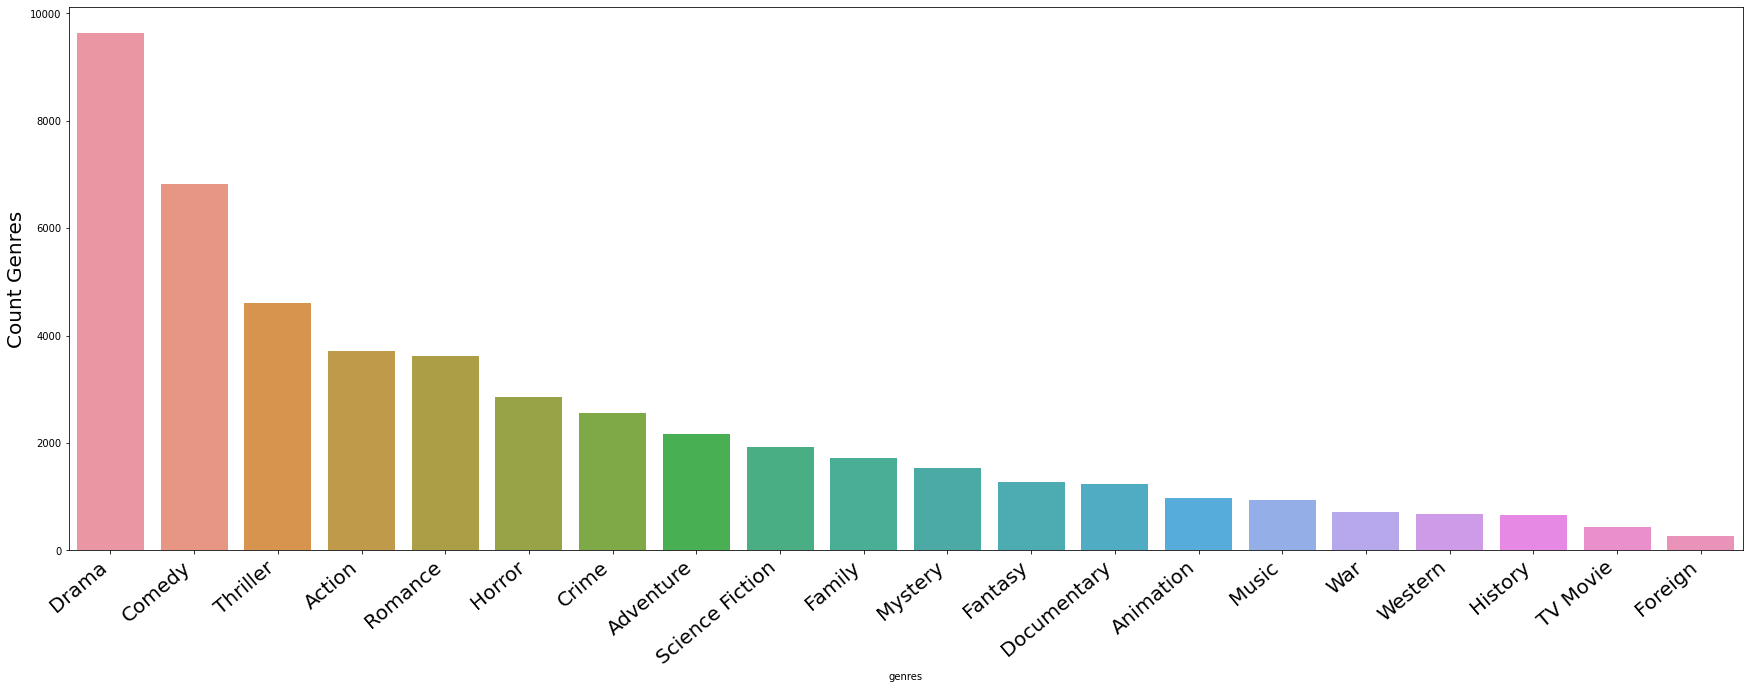

In [56]:
### mostly movies genre
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=Genre.nlargest(32,'count_genre'), x='genres', y='count_genre' )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=40, ha="right")
ax.set_ylabel('Count Genres', fontsize=20)

C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

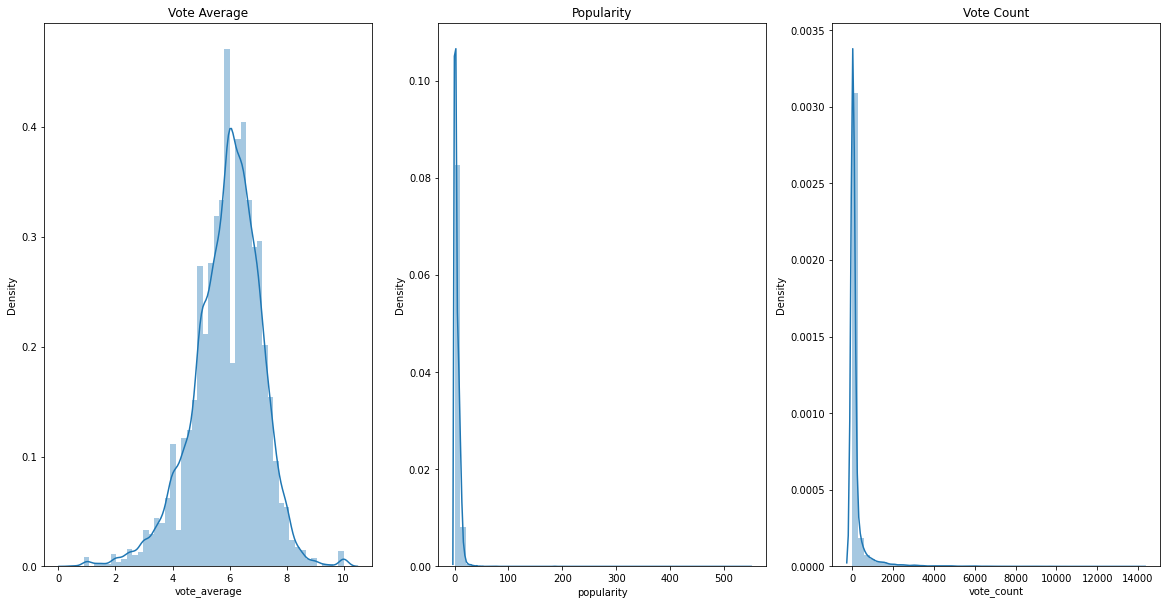

In [57]:
#check the voting, popularity period
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.distplot(df_eda['vote_average'],ax=ax[0])
ax[0].set_title('Vote Average')

sns.distplot(df_eda['popularity'],ax=ax[1])
ax[1].set_title('Popularity')

sns.distplot(df_eda['vote_count'],ax=ax[2])
ax[2].set_title('Vote Count')
plt.show()


<AxesSubplot:xlabel='runtime', ylabel='Count'>

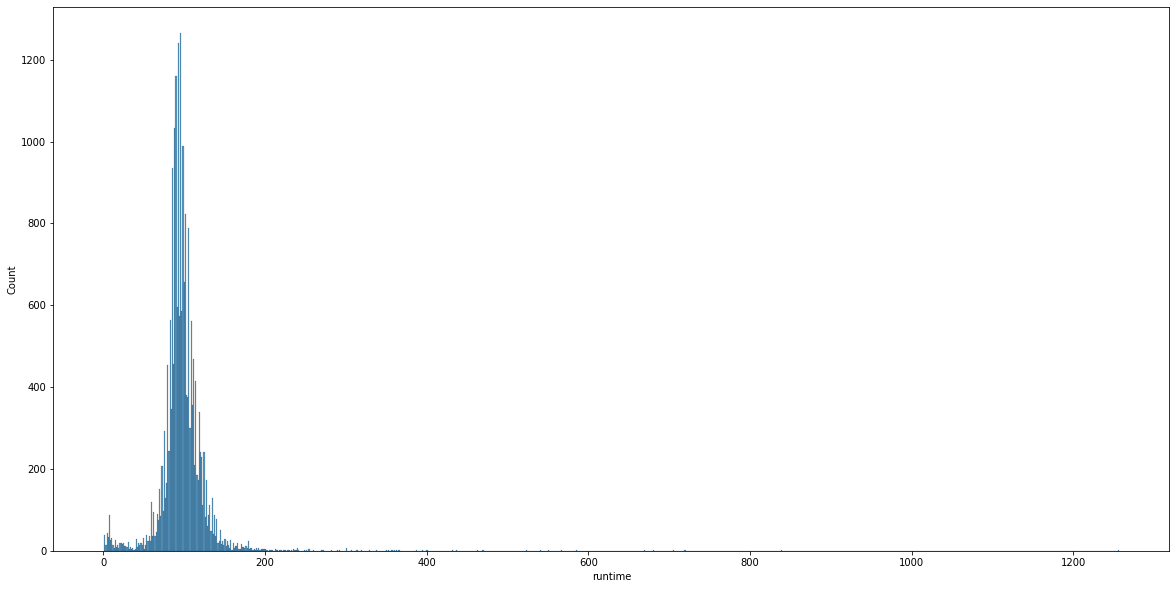

In [58]:
plt.figure(figsize=(20,10))
sns.histplot(df_eda['runtime'])

In [59]:
listGenre = []
listRuntime = []
for genre, run in zip(df_eda['genres'].str.split(', '), df_eda['runtime']):
    listGenre = listGenre+genre
    listRuntime = listRuntime+[run for i in range(len(genre))]



In [60]:
new_runtime_genre = pd.DataFrame({
    'genres': listGenre,
    'runtime': listRuntime
})

In [61]:
new_runtime_genre

,genres,runtime
0,Animation,81.0
1,Comedy,81.0
2,Family,81.0
3,Adventure,104.0
4,Fantasy,104.0
...,...,...
48335,Horror,65.0
48336,Mystery,65.0
48337,Thriller,65.0
48338,Horror,30.0


<AxesSubplot:xlabel='genres', ylabel='runtime'>

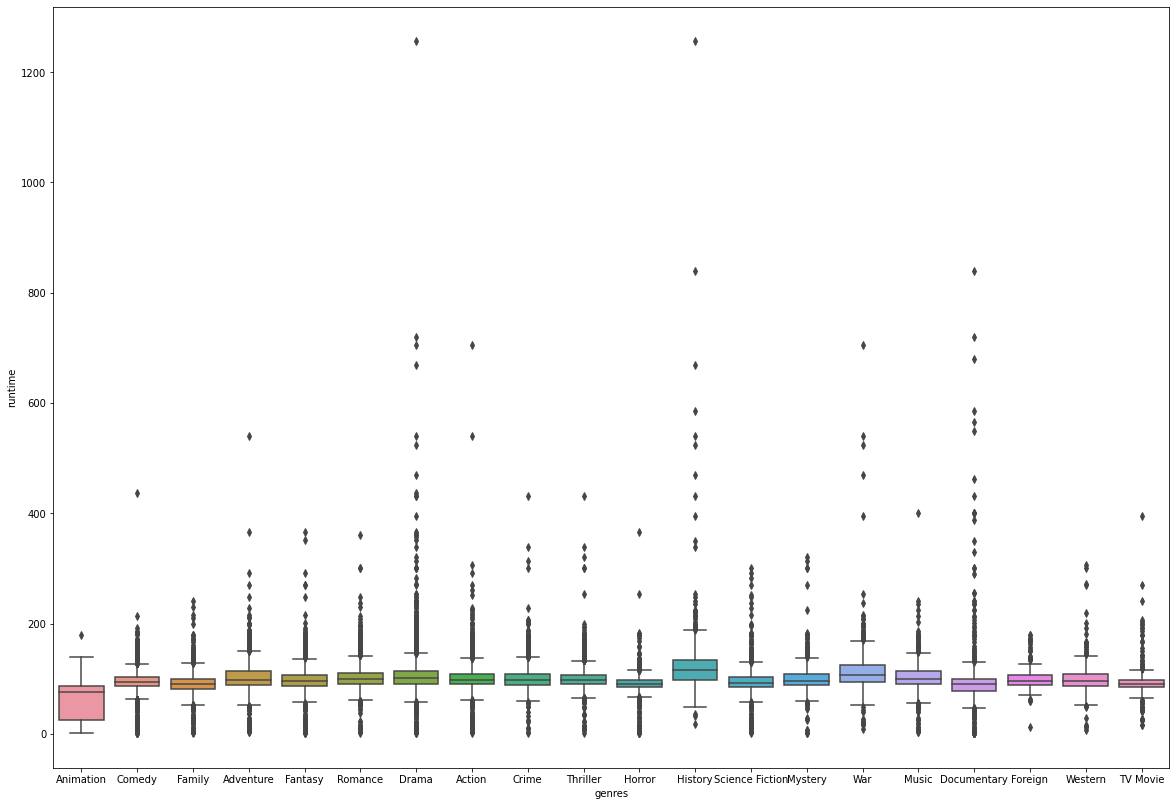

In [62]:
plt.figure(figsize=(20,14))
sns.boxplot(x='genres', y='runtime', data=new_runtime_genre)

In [63]:
#create new dataframe for checking whether how many adult in column adult
check_adult = df.adult.value_counts()
adult_df = pd.DataFrame({"adult" : check_adult.index, "adult_count" : check_adult}).reset_index(drop = True)
adult_df

,adult,adult_count
0,Non-Adult,21240
1,Adult,1


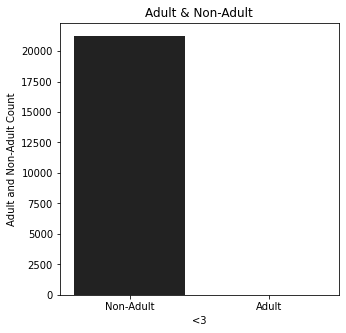

In [64]:
plt.figure(figsize = (5, 5))
sns.barplot(data=adult_df, x='adult', y='adult_count',color="#222")
plt.ylabel("Adult and Non-Adult Count")
plt.xlabel("<3")
plt.title("Adult & Non-Adult");

# Feature Engineering
## What feature should I decide to give the model to train itself to be predicting a similarity movie?
    1. Genre
    2. Overview
    4. imdb score

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

## Drop unnecessary columns

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21241 entries, 0 to 21240
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 21241 non-null  int64   
 1   adult                 21241 non-null  object  
 2   genres                21241 non-null  object  
 3   original_language     21241 non-null  object  
 4   original_title        21241 non-null  string  
 5   overview              21241 non-null  object  
 6   popularity            21241 non-null  category
 7   production_companies  21241 non-null  string  
 8   runtime               21241 non-null  object  
 9   vote_average          21241 non-null  category
 10  vote_count            21241 non-null  category
dtypes: category(3), int64(1), object(5), string(2)
memory usage: 1.4+ MB


### Combining features
    - Using 9 features to be combined to create a new columns
        - Genres
        - Original_title
        - Original_language
        - Overview
        - Popularity
        - Production_Companies
        - Runtime
        - Vote Average
        - Vote Count

In [67]:
# df.drop(columns=['index', 'adult', 'imdb_id', 'id', 'poster_path', 'production_countries', 'revenue', 'release_date', 'status', 'title', 'video', 'budget', 'spoken_languages'], axis=1)

In [68]:
def combining_features(row):
    return row['genres'] + " " + row['original_title'] + " " + row['production_companies'] + " " + row['original_language'] + " " + row['runtime'] + " " + row['overview'] + " " + row['popularity'] + " " + row['vote_average'] + ' ' + row['vote_count']

In [69]:
df['combining_features'] = df.apply(combining_features, axis=1)

# Modeling
    We have got 2 choices to select which are 
        1. CountVectorizer with Cosine_similarity
        2. TfidfVectorizer with cosine_similarity

## Test case for benchmarking

In [70]:
dummy_data = 'Jumanji'

In [71]:
def get_index(title):
    return df.loc[df['original_title'] == title].index.values[0]

In [72]:
dummy_index = get_index(dummy_data)
dummy_index

1

In [73]:
vector = CountVectorizer().fit_transform(df['combining_features'])

In [74]:
def get_title(index):
    return df.loc[df.index == index]['original_title'].values[0]

### CountVectorizer With Cosine_Similarity

In [75]:
item_similarity = cosine_similarity(vector)

In [76]:
# vector = CountVectorizer().fit_transform(df['genres'])
item_similarity = list(enumerate(item_similarity[dummy_index]))
sorted_similar_movies = sorted(item_similarity, key=lambda x: x[1], reverse=True)
for j in range(5):
    '''row['genres'] + " " + row['original_title'] + " " + row['production_companies'] + " " + row['original_language'] + " " + row['runtime'] + " " + row['overview'] + " " + row['popularity'] + " " + row['vote_average'] + ' ' + row['vote_count']'''
    genre_print = df.loc[df.index == sorted_similar_movies[j][0]]['genres'].values[0]
    popularity_print = df.loc[df.index == sorted_similar_movies[j][0]]['popularity'].values[0]
    pc_print = df.loc[df.index == sorted_similar_movies[j][0]]['production_companies'].values[0]
    ol_print = df.loc[df.index == sorted_similar_movies[j][0]]['original_language'].values[0]
    runtime_print = df.loc[df.index == sorted_similar_movies[j][0]]['runtime'].values[0]
    va_print = df.loc[df.index == sorted_similar_movies[j][0]]['vote_average'].values[0]
    vc_print = df.loc[df.index == sorted_similar_movies[j][0]]['vote_count'].values[0]
    print(f'Movie title = {get_title(sorted_similar_movies[j][0])}\nMatching Score = {sorted_similar_movies[j][1]}\nGenre = {genre_print}\nOriginal language = {ol_print}\nProduction Companies = {pc_print}\nRuntime = {runtime_print}\nVote Average = {va_print}\nVote Count = {vc_print}\n')
#show another column

Movie title = Jumanji
Matching Score = 0.9999999999999998
Genre = Adventure, Fantasy, Family
Original language = en
Production Companies = TriStar Pictures, Teitler Film, Interscope Communications
Runtime = Medium
Vote Average = High
Vote Count = Low

Movie title = The Long and the Short and the Tall
Matching Score = 0.4580130646754981
Genre = War, Drama
Original language = en
Production Companies = Michael Balcon Productions
Runtime = Medium
Vote Average = High
Vote Count = Low

Movie title = Stay Alive
Matching Score = 0.4562696793638886
Genre = Horror, Thriller
Original language = en
Production Companies = Spyglass Entertainment, Hollywood Pictures, Endgame Entertainment, Wonderland Sound and Vision
Runtime = Medium
Vote Average = Medium
Vote Count = Low

Movie title = Make-Out with Violence
Matching Score = 0.4561411835274055
Genre = Comedy, Fantasy, Horror, Romance
Original language = en
Production Companies = Limerent Pictures
Runtime = Medium
Vote Average = Medium
Vote Count = L

### TfidfVectorizer with Cosine_similarity

In [77]:
vector = TfidfVectorizer().fit_transform(df['combining_features'])

In [78]:
# vector = TfidfVectorizer(stop_words='english').fit_transform(df['genres'])
item_similarity = cosine_similarity(vector)

In [79]:
item_similarity = list(enumerate(item_similarity[dummy_index]))
sorted_similar_movies = sorted(item_similarity, key=lambda x: x[1], reverse=True)
for j in range(5):
    '''row['genres'] + " " + row['original_title'] + " " + row['production_companies'] + " " + row['original_language'] + " " + row['runtime'] + " " + row['overview'] + " " + row['popularity'] + " " + row['vote_average'] + ' ' + row['vote_count']'''
    genre_print = df.loc[df.index == sorted_similar_movies[j][0]]['genres'].values[0]
    popularity_print = df.loc[df.index == sorted_similar_movies[j][0]]['popularity'].values[0]
    pc_print = df.loc[df.index == sorted_similar_movies[j][0]]['production_companies'].values[0]
    ol_print = df.loc[df.index == sorted_similar_movies[j][0]]['original_language'].values[0]
    runtime_print = df.loc[df.index == sorted_similar_movies[j][0]]['runtime'].values[0]
    va_print = df.loc[df.index == sorted_similar_movies[j][0]]['vote_average'].values[0]
    vc_print = df.loc[df.index == sorted_similar_movies[j][0]]['vote_count'].values[0]
    print(f'Movie title = {get_title(sorted_similar_movies[j][0])}\nMatching Score = {sorted_similar_movies[j][1]}\nGenre = {genre_print}\nOriginal language = {ol_print}\nProduction Companies = {pc_print}\nRuntime = {runtime_print}\nVote Average = {va_print}\nVote Count = {vc_print}\n')
#show another column

Movie title = Jumanji
Matching Score = 1.0000000000000002
Genre = Adventure, Fantasy, Family
Original language = en
Production Companies = TriStar Pictures, Teitler Film, Interscope Communications
Runtime = Medium
Vote Average = High
Vote Count = Low

Movie title = The Mindscape of Alan Moore
Matching Score = 0.17451782241997296
Genre = Documentary
Original language = en
Production Companies = Tale Filmproduktion, Shadowsnake Films
Runtime = Medium
Vote Average = Medium
Vote Count = Low

Movie title = Stay Alive
Matching Score = 0.16973607773448435
Genre = Horror, Thriller
Original language = en
Production Companies = Spyglass Entertainment, Hollywood Pictures, Endgame Entertainment, Wonderland Sound and Vision
Runtime = Medium
Vote Average = Medium
Vote Count = Low

Movie title = Brainscan
Matching Score = 0.16879930649784783
Genre = Fantasy, Horror, Science Fiction
Original language = en
Production Companies = Admire Productions Ltd., Coral Productions, Triumph Films
Runtime = Medium

### Summary

#### CountVectorizer with cosine_similarity algorithm
The pair of features_engineering algorithm "CountVectorizer" and the "cosine_similarity" item similarity scoring,
it results with mid range (0.4-0.6) scores of each movies which are the highest scores.
so we decided to check whether each movie has the similar type(s) to dummy data ('Jumanji')
and here is the result :
![](img/cc_edited.png)
As you can see that there are four movies that has the similar genres to Jumanji. 
This algorithm takes 32.4 seconds to scoring movies similarity scores

#### TfidfVectorizer with cosine_similarity algorithm
The pair of features_engineering algorithm "TfidfVectorizer" and the "linear_kernel" item similarity scoring,
it results with low range (0.1-0.3) scores of each movies
so we decided to check whether each movie has the similar type(s) to dummy data ('Jumanji')
and here is the result :
![](img/tc_edited.png)
As you can see that there no movie that has the similar genres to Jumanji (if we don't take comedy movies). 
So we decided to cut this out from benchmark list of algorithms

# Selected Algorithm and model
So as the benchmark results say pairing with CountVectorizer and Cosine Similarity model and TfidfVectorizer and Cosine Similarity are not resulted the same. One has high score in similar movies matching score and another has a very low matching score.

According to the result, there's only a pair of algorithms that has the results as developer expected, it is
## CountVectorizer with Cosine Similarity

## Show similar movies

In [80]:
cv = CountVectorizer()
vector = cv.fit_transform(df['combining_features'])

In [81]:
item_similarity = cosine_similarity(vector)

In [82]:
def get_title(index):
    return df.loc[df.index == index]['original_title'].values[0]

In [83]:
def test_case_movie(dummy_index):
    similar_movies = list(enumerate(item_similarity[dummy_index]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    similar_movies_arr = []
    score = []
    for j in range(1, 6):
        similar_movies_arr.append(get_title(sorted_similar_movies[j][0]))
        score.append(sorted_similar_movies[j][1])
    return similar_movies_arr, score

In [84]:
toy_story = get_index("Toy Story")
jumanji = get_index("Jumanji")
deep_hearts = get_index("Grumpier Old Men")


In [85]:
similar_toy ,score_toy = test_case_movie(toy_story)

In [86]:
similar_jumanji ,score_jumanji = test_case_movie(jumanji)

In [87]:
similar_deep ,score_deep = test_case_movie(deep_hearts)

In [88]:
# test case toy story
for idx, value in enumerate(similar_toy):
    print(f'Movie title : {value}, Movie Matching Score : {score_toy[j].round(2)}')

Movie title : Toy Story 2, Movie Matching Score : 0.4
Movie title : Toy Story 3, Movie Matching Score : 0.4
Movie title : Small Fry, Movie Matching Score : 0.4
Movie title : The Smurfs, Movie Matching Score : 0.4
Movie title : Andy Hardy's Private Secretary, Movie Matching Score : 0.4


In [89]:
for idx, value in enumerate(similar_jumanji):
    print(f'Movie title : {value}, Movie Matching Score : {score_jumanji[j].round(2)}')

Movie title : The Long and the Short and the Tall, Movie Matching Score : 0.45
Movie title : Stay Alive, Movie Matching Score : 0.45
Movie title : Make-Out with Violence, Movie Matching Score : 0.45
Movie title : Beta Test, Movie Matching Score : 0.45
Movie title : 3 Ninjas, Movie Matching Score : 0.45


In [90]:
for idx, value in enumerate(similar_deep):
    print(f'Movie title : {value}, Movie Matching Score : {score_deep[j].round(2)}')

Movie title : Robin Redbreast, Movie Matching Score : 0.5
Movie title : Ella Cinders, Movie Matching Score : 0.5
Movie title : The Snapper, Movie Matching Score : 0.5
Movie title : Escape in the Fog, Movie Matching Score : 0.5
Movie title : The Unsinkable Molly Brown, Movie Matching Score : 0.5


# Pipeline
## Pre-Processing
    - Remove rows which are null
    - Remove rows which are duplicated
    - Correcting genres (into string form)
    - Mapping genres
    - Preparing data for modeling

In [91]:
movies_pipe_line = pd.read_csv('movies_metadata.csv')

C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
class PipeLine:
    def __init__(self, data):
        self.df = data.copy()
    def executeDataPrep(self):
        # drop columns
        self.df = self.df.drop(columns=['adult', 'tagline', 'belongs_to_collection', 'homepage', 'imdb_id', 'id', 'poster_path', 'production_countries', 'revenue', 'release_date', 'status', 'title', 'video', 'budget', 'spoken_languages'], axis=1)
        
        # drop null rows
        self.df.dropna(axis=0, inplace=True)

        # drop duplicated rows
        self.df.drop_duplicates(inplace=True)

        #drop none genres movies
        self.df.drop(self.df.loc[self.df['genres'] == '[]'].index, inplace=True)

        #drop non-en languages
        self.df.drop(self.df.loc[self.df['original_language'] != 'en'].index, inplace=True)

        #drop none production companies filled rows
        self.df.drop(self.df.loc[self.df['production_companies'] == '[]'].index, inplace=True)

        #drop rows that contain 0 votes
        self.df.drop(self.df.loc[self.df['vote_count'] == 0].index, inplace=True)

        #drop rows that container 0.0 vote average
        self.df.drop(self.df.loc[self.df['vote_average'] == 0].index, inplace=True)

        #drop none runtime rows
        self.df.drop(self.df.loc[self.df['runtime'] == 0].index, inplace=True)

        #correcting form of group columns
        regex = re.compile(r": '(.*?)'")
        self.df['genres'] = self.df['genres'].apply(lambda x: ",".join(regex.findall(x)))
        self.df['production_companies'] = self.df['production_companies'].apply(lambda x: ",".join(regex.findall(x)))
        
        #mapping adult column
        # self.df['adult'] = self.df['adult'].astype('string')
        # self.df['adult'] = self.df['adult'].map({
        #     'False' : 'Non-Adult',
        #     'True' : 'Adult'
        # })

        #grouping data
        self.df['runtime'] = self.df.apply(lambda x: self.runtimeMap(x), axis=1)
        # self.df['runtime'] = pd.cut(self.df['runtime'], bins=5, labels=['Short', 'Med-Short', 'Med', "Med-Long", 'Long'])
        self.df['popularity'] = self.df['popularity'].astype('float64')
        self.df['popularity'] = pd.cut(self.df['popularity'], bins=3, labels=['Low', 'Medium', 'High'])
        self.df['vote_average'] = pd.cut(self.df['vote_average'], bins=3, labels=['Low', 'Medium', 'High'])
        self.df['vote_count'] = pd.cut(self.df['vote_count'], bins=3, labels=['Low', 'Medium', 'High'])

        #reset indexes
        self.df = self.df.reset_index(drop=True)

        #combining_features
    def combined_features(self, row):
        return row['genres'] + " " + row['original_title'] + " " + row['production_companies'] + " " + row['original_language'] + " " + row['runtime'] + " " + row['overview'] + " " + row['popularity'] + " " + row['vote_average'] + ' ' + row['vote_count']
    def executeCombiningFeatures(self):
        self.df['combined_features'] = self.df.apply(self.combined_features, axis=1)
    def executeFeatureExtracting(self):
        cv = CountVectorizer()
        vector = cv.fit_transform(self.df['combined_features'])
        return vector
    # def executeCS(self, vector):
    #     itemSimilarity = cosine_similarity(vector)
    #     return itemSimilarity
    def runtimeMap(self, x):
        if x['runtime'] < 120:
            if x['runtime'] <= 30:
                return 'Short'
            else :
                return 'Medium'
        else :
            return 'Long'
    def mainExecute(self):
        self.executeDataPrep()
        self.executeCombiningFeatures()
        vector = self.executeFeatureExtracting()
        # itemSimilarity = self.executeCS(vector)
        return vector

In [93]:
pipe = PipeLine(movies_pipe_line)
vector = pipe.mainExecute()
pipe.df

,genres,original_language,original_title,overview,popularity,production_companies,runtime,vote_average,vote_count,combined_features
0,"Animation,Comedy,Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Low,Pixar Animation Studios,Medium,High,Medium,"Animation,Comedy,Family Toy Story Pixar Animat..."
1,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,Low,"TriStar Pictures,Teitler Film,Interscope Commu...",Medium,High,Low,"Adventure,Fantasy,Family Jumanji TriStar Pictu..."
2,"Romance,Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,Low,"Warner Bros.,Lancaster Gate",Medium,Medium,Low,"Romance,Comedy Grumpier Old Men Warner Bros.,L..."
3,"Comedy,Drama,Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Low,Twentieth Century Fox Film Corporation,Long,Medium,Low,"Comedy,Drama,Romance Waiting to Exhale Twentie..."
4,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,Low,"Sandollar Productions,Touchstone Pictures",Medium,Medium,Low,Comedy Father of the Bride Part II Sandollar P...
...,...,...,...,...,...,...,...,...,...,...
22392,"Horror,Mystery,Thriller",en,House of Horrors,An unsuccessful sculptor saves a madman named ...,Low,Universal Pictures,Medium,Medium,Low,"Horror,Mystery,Thriller House of Horrors Unive..."
22393,Horror,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,Low,"Neptune Salad Entertainment,Pirie Productions",Short,High,Low,Horror The Burkittsville 7 Neptune Salad Enter...
22394,Science Fiction,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,Low,Concorde-New Horizons,Medium,Low,Low,Science Fiction Caged Heat 3000 Concorde-New H...
22395,"Drama,Action,Romance",en,Robin Hood,"Yet another version of the classic epic, with ...",Low,"Westdeutscher Rundfunk (WDR),Working Title Fil...",Medium,Medium,Low,"Drama,Action,Romance Robin Hood Westdeutscher ..."


In [94]:
itemSimilarity = cosine_similarity(vector)

# Recommendation Function
    - Getting an input from users
    - Finding index of movie name
    - Getting similar movies as an array
    - Sorting array
    - Getting the first 5 positions which are similar to the input

In [95]:
class Recommender:
    def __init__(self, movieName, movieData, itemSimilarity) -> None:
        self.movieName = movieName
        self.df = movieData.copy()
        self.itemSimilarity = itemSimilarity
    def getIndex(self, movieName):
        return self.df.loc[self.df['original_title'] == movieName].index.values[0]
    def getTitle(self, index):
        return self.df.loc[self.df.index == index]['original_title'].values[0] , self.df.loc[self.df.index == index]['genres'].values[0] , self.df.loc[self.df.index == index]['overview'].values[0]
    def printResult(self, sortedSimilarMovie):
        moviesName = list()
        moviesGenre = list()
        moviesOverview = list()
        moviesScore = list()
        for j in range(1, 6):
            setMovieName, setMovieGenre, setMovieOverview = self.getTitle(sortedSimilarMovie[j][0])
            moviesName.append(setMovieName)
            moviesGenre.append(setMovieGenre)
            moviesOverview.append(setMovieOverview)
            moviesScore.append(sortedSimilarMovie[j][1])
            print(f'Movie name = {self.getTitle(sortedSimilarMovie[j][0])} |   Movie Score = {sortedSimilarMovie[j][1].round(2)}')
        return moviesName, moviesOverview, moviesGenre, moviesScore
    def recommend(self, movieName):
        movieIndex = self.getIndex(movieName)
        similarMovie = list(enumerate(self.itemSimilarity[movieIndex]))
        sortedSimilarMovie = sorted(similarMovie, key=lambda x:x[1], reverse=True)
        moviesName, moviesOverview, moviesGenre, moviesScore = self.printResult(sortedSimilarMovie)
        preferedMovieGenre = self.df.loc[self.df['original_title'] == movieName]['genres'].values[0]
        preferedMovieOverview = self.df.loc[self.df['original_title'] == movieName]['overview'].values[0]
        preferedMovieStatement = '-'*50+ f'\n| Movie title : {movieName} |\n| Genre : {preferedMovieGenre} |\n| Overview : {preferedMovieOverview} |\n' + '-'*50
        output = f'The most similar movie is => {moviesName[0]}\nGenre = {moviesGenre[0]}\nOverview : {moviesOverview[0]}\nMatching score = {(moviesScore[0] * 100).round(2)}%\n\nThe 2nd similar movie is => {moviesName[1]}\nGenre = {moviesGenre[1]}\nOverview : {moviesOverview[1]}\nMatching score = {(moviesScore[1]*100).round(2)}%\n\nThe 3rd similar movie is => {moviesName[2]}\nGenre = {moviesGenre[2]}\nOverview : {moviesOverview[2]}\nMatching score = {(moviesScore[2]*100).round(2)}%\n\nThe 4th similar movie is => {moviesName[3]}\nGenre = {moviesGenre[3]}\nOverview : {moviesOverview[3]}\nMatching score = {(moviesScore[3]*100).round(2)}%\n\nThe 5th similar movie is => {moviesName[4]}\nGenre = {moviesGenre[4]}\nOverview : {moviesOverview[4]}\nMatching score = {(moviesScore[4]*100).round(2)}%\n'
        return preferedMovieStatement, output

In [96]:
rcmder = Recommender('Jumanji', movieData=pipe.df, itemSimilarity=itemSimilarity)

# Deployment
    - Web app
        - Getting an input in string form. (Movie name)
        - Output as a set of movies with its detail.

In [97]:
import gradio

In [98]:
iface = gradio.Interface(fn=rcmder.recommend,
                     inputs=[gradio.inputs.Textbox(label='Enter Movie Name', default='Jumanji')],
                     outputs=[gradio.outputs.Textbox(label="User preference movie"),
                     gradio.outputs.Textbox(label="Similar movies")])
iface.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

Movie name = ('The Long and the Short and the Tall', 'War,Drama', 'Based on a play by Willis Hall. A troop of British soldiers are out in the jungle to record jungle noises and troop noises in the jungle so that the recordings can be played back by other troops to divert the enemy to their whereabouts. As they progress to what they think is closer to the base camp they find themselves farther and farther from radio range until the only channel they can get clearly is that of a Japanese broadcast. They now realize they are probably only 10 to 15 miles from a Japanese camp! The tension is added to by rowdy and openly admitted "non-hero" Private Bamforth who has nothing good to say about anyone and especially Corporal Johnstone (who holds an equal dislike for Bamforth). When a Japanese soldier is taken as their prisoner, the true colors of each man comes to the surface') |   Movie Score = 0.46
Movie name = ('Stay Alive', 'Horror,Thriller', 'After the mysterious, brutal death of an old fri

# References
    - https://www.kaggle.com/bentan233/movie-recommender-systems
    - https://www.kaggle.com/hankarmostafa/building-a-simple-movie-recommendation-system
    - https://www.kaggle.com/jashandeepkaur06/tmdb-movies-eda-jk#Project:-Investigating-TMDb-dataset
    - https://www.kaggle.com/rounakbanik/the-movies-dataset
    - https://github.com/MacClay/CS434/blob/main/cs434_finalexam__%E0%B8%AD%E0%B8%B5%E0%B8%AB%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B8%A7%E0%B8%B0_%E0%B8%AB%E0%B9%89%E0%B8%A7%E0%B8%A2_!_.ipynb

# Members
    - Krittinaphat Srisuwan 1620704823
    - Tanabut Porka 1620703254
    - Teerapop Junchean 1620703312